#  Aluno: Joao Pedro Miranda Marques
#  Matricula 2017050495
#  UFMG

#  Strings Matching Problem
#  Genetic Algorithm 

In [1]:

#Bibliotecas

import random as rd
import numpy as np
import matplotlib.pyplot

In [2]:
#initializing
# def geneticAlgorithm(charOptions,objective, objectiveSize, numbSubjects, crossover_rate, mutation_rate):
charOptions = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ*'
objective = 'METHINKS*IT*IS*LIKE*A*WEASEL'
objectiveSize = 28
numbSubjects = 10 # quantidade de individuos na populacao
crossover_rate = 0.6
mutation_rate = 0.2

In [3]:
#Inicializando populacao

 #inicializa individuo (subject)
def init_subject(objectiveSize, charOptions):
    
    subject = ''
    
    for i in range (objectiveSize):
        subject += rd.choice(charOptions)
        
    return subject

# subj = init_subject(objectiveSize, charOptions)
# print('Individuo')
# print(subj)

 #inicializa populacao (population)
def init_population(numbSubjects):
    
    population = []
    
    for i in range (0, numbSubjects):
        population.append(init_subject(objectiveSize, charOptions))
        
    return population

pop = init_population(numbSubjects)
print('Populacao')
print(pop)


Populacao
['N*MEYRTKRIOCQFGUYOJINSRPLFBV', 'TKZMPNLVFLPQTELHCBJ*BMYMZEHR', 'EQDHNGDATAYSG*HDHYLLYYSWETPZ', 'AYTLNFBAYHPUMASADYLBGBSAQICX', 'SUQZAMMTCXCBCKWIDEATLUBOQPJQ', 'X*F*ZTIFQIITQ*UCQCJTVHOASWJS', 'R*JUPABNUHLOAJUFIENBDEPQFMHT', 'DOGVMBSULDJLXRKVWENFNTFGUCUB', 'EZHN*CQWBWSMKFODJ*OCVYOHJWAP', '*TQEBRZOCTLNSQLCAGPKFWDPQKVK']


In [4]:

def fitness_calc(objective, subject, objectiveSize):
    
    match = 0

    for i in range(objectiveSize):
        if subject[i] == objective[i]:
            match = match + 1
            
    return match


#returns array of all fitness
def evaluation(pop, numbSubjects):
    
    fitnessVector = []
    
    for i in range(0, numbSubjects):
        fitnessVector.append(fitness_calc(objective, pop[i], objectiveSize))

    return  fitnessVector




fitnessVector = evaluation(pop, numbSubjects)
print('All fitness')
print(fitnessVector)

def objective_acomplish(fitnessVector, numbSubjects, objectiveSize):
    
    objectiveDone = 0
    vector = np.array(fitnessVector)
    
    for i in range (0, numbSubjects):
        if vector[i] == objectiveSize:
            objectiveDone = 1
            
    return  objectiveDone


# teste = objective_acomplish(fitnessVector, numbSubjects, objectiveSize)
# print('objDone?')
# print(teste)

All fitness
[1, 2, 1, 1, 0, 1, 1, 0, 0, 0]


In [5]:

#return two best fitness of fitnessVector
def get_two_best_fitness(fitnessVector):
    
    index1 = 0
    index2 = 0
    actualbest1 = 0
    aux = fitnessVector.copy()
    actualbest2 = 0
    
   
    
    for i in fitnessVector:
        if i >= actualbest1:
            actualbest1 = i
            index1 = fitnessVector.index(actualbest1)
            
    aux.pop(index1)
            
    for j in aux:
        if j >= actualbest2:
            actualbest2 = j
            index2 = aux.index(actualbest2)

    if index2 >= index1:
        index2 += 1
            
#     print('fitnessVector :')
#     print(fitnessVector)
            
    return index1, index2



def selection(pop, ind1, ind2):
#retorna dentre 5 solucoes aleatorias as duas melhores.
    _aux = 5
    aleatorios = []

    for i in range (_aux):
        aleatorios.append(rd.choice(pop))
    
#     print('index1, index2')
#     print(ind1, ind2)
    
    parents = [pop[ind1], pop[ind2]]
    
#     print('aleatorios')
#     print(aleatorios)

    return parents



# two_besterr = get_two_best_fitness(fitnessVector)
# print('primeira func')
# print(two_besterr)
ind1, ind2 = get_two_best_fitness(fitnessVector)
subset_parents = selection(pop, ind1, ind2)
print('Pais')
print(subset_parents)


Pais
['TKZMPNLVFLPQTELHCBJ*BMYMZEHR', 'N*MEYRTKRIOCQFGUYOJINSRPLFBV']


In [6]:
#retorna um subset (dois individuos) como resultado do possivel cruzamento dos pais.
def crossover(subset_parents, crossover_rate):

    lista1 = subset_parents[0]
    lista2 = subset_parents[1]

    resp1 = []
    resp2 = []
    
   # Crossover com 1 Ponto de Corte aleatorio
   # so acontece se um valor aleatorio entre 1 e 0 for menor que o crossover_rate
    
    #crossover do primeiro par de pais
    prob = rd.uniform(0, 1)
    
    if prob < crossover_rate:
        cut = rd.randint(1, objectiveSize)

        resp1 = lista1[0:cut] + lista2[cut:objectiveSize]
        resp2 = lista2[0:cut] + lista1[cut:objectiveSize]
        
    else:
        resp1 = lista1
        resp2 = lista2

        
    offspring = (resp1, resp2)

    return offspring


offspring = crossover(subset_parents, crossover_rate)
print(offspring)

('T*MEYRTKRIOCQFGUYOJINSRPLFBV', 'NKZMPNLVFLPQTELHCBJ*BMYMZEHR')


In [11]:
def mutation(offspring, mutation_rate, charOptions):
#retorna um subset (dois individuos) como resultado da mutacao dos filhos

    probRate = mutation_rate
    
    
    child1 = ''
    for j in range(len(offspring[0])):
        prob = rd.uniform(0, 1)
        if prob < mutation_rate:
            index = round(rd.randint(1, len(charOptions) - 1))
            child1 += charOptions[index]
        else:
            child1 += offspring[0][j]
            
    child2 = ''
    for j in range(len(offspring[1])):
        prob = rd.uniform(0, 1)
        if prob < mutation_rate:
            index = round(rd.randint(1, len(charOptions) - 1))
            child2 += charOptions[index]
        else:
            child2 += offspring[1][j]
    
#     print(child2)

    offspring_new = (child1, child2)
    
    return offspring_new

offspring_new = mutation(offspring,mutation_rate, charOptions)
print(offspring_new)

('T*UZYROSRIGTQFGUYOJINSRPLNBV', 'NKZMPNLIFLPQTELZCBC*BMYMZEHR')


In [8]:
def replacement(offspring_new, pop, fitnessVector, ind1, ind2):
    
    index1 = ind1
    index2 = ind2
    
    while index1 == ind1 or index1 == ind2:
        index1= rd.randint(0,len(pop) - 1)
    while index2 == ind1 or index2 == ind2:
        index2= rd.randint(0,len(pop) - 1)

    pop[index1] = offspring_new[0]
    pop[index2] = offspring_new[1]
    
    rd.shuffle(pop)
    
    return pop

pop = replacement(offspring_new, pop, fitnessVector, ind1, ind2)
print(pop)

['EQDHNGDATAYSG*HDHYLLYYSWETPZ', 'N*MEYRTKRIOCQFGUYOJINSRPLFBV', 'GKZMPNLVOLDUW*LHCBJ*BUYMZEUY', 'EZHN*CQWBWSMKFODJ*OCVYOHJWAP', 'N*MEYXTJRIOCJDMUYOLINSRPLFBY', 'SUQZAMMTCXCBCKWIDEATLUBOQPJQ', 'R*JUPABNUHLOAJUFIENBDEPQFMHT', '*TQEBRZOCTLNSQLCAGPKFWDPQKVK', 'X*F*ZTIFQIITQ*UCQCJTVHOASWJS', 'TKZMPNLVFLPQTELHCBJ*BMYMZEHR']


In [15]:
# loop principal do algoritmo evolutivo

def geneticAlgorithm(charOptions,objective, objectiveSize, numbSubjects, crossover_rate, mutation_rate):
    
    pop = init_population(numbSubjects)
    fitnessVector = evaluation(pop, numbSubjects)
    
    i_geracoes = 0
    medias = []
    objectiveDone = 0

    print("first population:")
    print (pop)
    print("first evaluation:")
    print(fitnessVector)


    while objectiveDone == 0 and i_geracoes < 20000:
        
        fitnessVector = evaluation(pop, numbSubjects) #fez uma nova avaliacao
        #print("novo evaluation")
        #print(fitnessVector)
        
        ind1, ind2 = get_two_best_fitness(fitnessVector)
        #print("Melhor Resultado: ")
        #print(pop[ind1])
        
        subset_parents = selection(pop, ind1, ind2) #selecao dos individuos mais aptos para o cruzamento
        #print("Pais")
        #print(subset_parents)
        
        offspring = crossover(subset_parents, crossover_rate) #cruzamento dos pais
        #print("cruzamento deles crossover")
        #print(offspring)
        
        offspring_new = mutation(offspring,mutation_rate, charOptions) #mutacao
        #print("mutacao")
        #print(offspring_new)

        pop =replacement(offspring_new, pop, fitnessVector, ind1, ind2) #atualizacao da populacao
        #print("nova populacao")
        #print(pop)
        
        objectiveDone = objective_acomplish(fitnessVector, numbSubjects, objectiveSize)
        i_geracoes += 1

        medias.append(sum(fitnessVector)/numbSubjects)
        
    
    print("final population:")
    print(pop)
    print("final evaluation: ")
    print(fitnessVector)
    print("interacoes: ")
    print(i_geracoes)

    matplotlib.pyplot.xlabel('Geracoes')
    matplotlib.pyplot.ylabel('Media de fitness')
    matplotlib.pyplot.plot(medias)
    
    return pop

Vemos que o algoritmo nao alcanca o maximo global, ou seja, nao consegue se igualar ao objetivo em menos de 10k interacoes. Isso se deve a grande diversidade no algoritmo, devido a sua mutacao ser brusca. 
O fato da mutacao ser brusca faz chegar rapidamente proximo do valor objetivo, porem, dificilmente com erro zero.

first population:
['KYYYQLQAGCCWOVYFRG*ZLJFKAZHL', 'FVLCBBJQNMA*SSKPGUWALWKGXKMJ', 'SPNOXUIVXETYGBNXXADSXNBOKE*X', 'JBQGGBJZSMOHOVDX*VFPCLERBUKD', 'TIVHCPZ*ECXMSMPCPTAMEEORT*OF', 'EF*VRUULU*WSBKVXJNPEGLTPWZWH', 'GWOZMJRVWBJMORJAWOSQIXEZMLUU', 'XCX*KVDAZPDFMNSVNMUPBVCZENOL', 'UIHKYTJVZBWWQP*UQGIEENORAUPL', 'WOKFZNHZNWGUTMUWS*HMOKMNRNTI']
first evaluation:
[2, 2, 1, 0, 1, 0, 0, 1, 3, 1]
final population:
['METHINKS*IT*IS*LIFE*M*WEYSEL', 'MVTFINKK*IT*XS*DIFENG*WZYSPW', 'METHINKS*IT*IS*LIFE*M*WELSEL', 'METHBNKS*IT*ISILIFE*M*WSYSEO', 'METHINKSWIT*IS*LIFE*M*WELSIH', 'METSIFKSLIT*US*XIFE*C*WELWEQ', 'METHINKS*IN*IS*LIFE*M*WEQSEL', 'MRTHINKSIIT*IS*JIFE*M*WXLSEL', 'HETHINKSNZT*HI*EIFESB*OEYSEL', 'METHINUS*IS*FS*LIFE*M*WELEEL']
final evaluation: 
[19, 18, 21, 22, 25, 25, 21, 17, 21, 24]
interacoes: 
20000


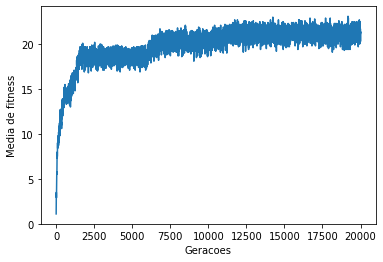

In [16]:
medias = geneticAlgorithm(charOptions,objective, objectiveSize, numbSubjects, crossover_rate, mutation_rate)